ch7. 1~5 pg. 409~451

## Chapter 7 군집화

## 01 K-평균 알고리즘 이해

K-평균: 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트를 선택하는 군집화 기법

군집 중심점은 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 평균 지점으로 이동하는 프로세스를 반복적으로 수행함. 모든 데이터 포인트에서 더이상 중심점의 이동이 없을 경우에 반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화하는 기법

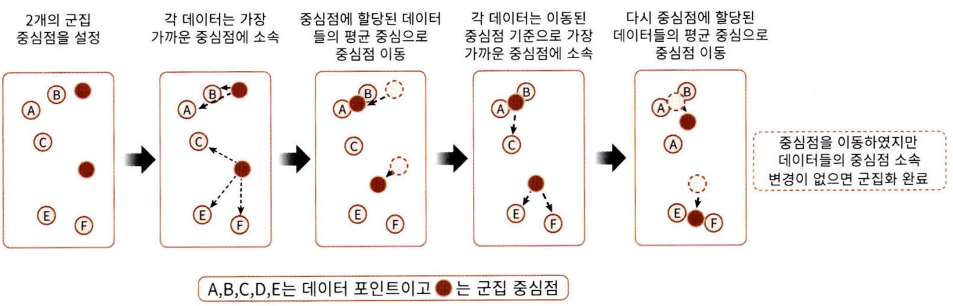

1. 먼저 군집화의 기준이 되는 중심을 구성하려는 군집화 개수만큼 임의의 위치에 가져다 놓습니다. 

2. 각 데이터는 가장 가까운 곳에 위치한 중심점에 소속됩니다.

3. 이렇게 소속이 결정되면 군집 중심점을 소속된 데이터의 평균 중심으로 이동합니다. 

4. 중심점이 이동했기 때문에 각 데이터는 기존에 속한 중심점보다 더 가까운 중심점이 있다면 해당 중심점으로 다시 소속을 변경합니다.

5. 다시 중심을 소속된 데이터의 평균 중심으로 이동합니다.

6. 중심점을 이동했는데 데이터의 중심점 소속 변경이 없으면 군집화를 종료합니다. 

- 장점: 일반적인 군집화에서 가장 많이 활용되는 알고리즘이고, 쉽고 간결함.

- 단점: 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐(이를 위해 PCA로 차원 축소를 적용해야 할 수 있음). 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느려짐. 몇 개의 군집을 선택해야 할지 가이드하기가 어려움.

### 사이킷런 KMeans 클래스 소개

<초기화 파라미터>


```
class sklearn.cluster.KMeans(n_cluster=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None,
copy_x=True, n_jobs=1, algorithm='auto')
```
  - KMeans 초기화 파라미터 중 가장 중요한 파라미터는 n_clusters이며, 군집화할 개수, 즉 군집 중심점의 개수를 의미함.

  - init는 초기에 군집 중심점의 좌표를 설정할 방식을 말하며 보통은 임의로 중심을 설정하지 않고 일반적으로 k-means++ 방식으로 최초 설정함.

- max_iter는 최대 반복 횟수이며, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료함. 

<속성 정보>
- labels_: 각 데이터 포인트가 속한 군집 중심점 레이블

- cluster_centers_: 각 군집 중심점 좌표(Shape는 [군집 개수, 피처 개수]), 이를 이용하면 군집 중심점 좌표를 시각화 할 수 있음. 




### K-평균을 이용한 붓꽃 데이터 세트 군집화

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
# 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF=pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
# 3개 그룹으로 군집화
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [3]:
# irisDF의 각 데이터가 어떤 중심에 속하는지 확인
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [4]:
# 실제 붓꽃 품종 분류값과의 차이로 군집화 효과 확인
irisDF['target']=iris.target
irisDF['cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


   sepal_length  sepal_width  petal_length  petal_width  target  cluster  \
0           5.1          3.5           1.4          0.2       0        1   
1           4.9          3.0           1.4          0.2       0        1   
2           4.7          3.2           1.3          0.2       0        1   

      pca_x     pca_y  
0 -2.684126  0.319397  
1 -2.714142 -0.177001  
2 -2.888991 -0.144949  


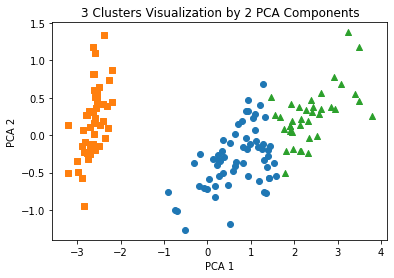

In [5]:
# 붓꽃 데이터 세트의 군집화를 시각화

# PCA를 이용하여 4개의 속성을 2개로 차원 축소 후 x,y좌표로 표현
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
print(irisDF.head(3))

# 군집 값이 0,1,2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y값 추출. o,s,^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'],y=irisDF.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'],y=irisDF.loc[marker1_ind,'pca_y'],marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'],y=irisDF.loc[marker2_ind,'pca_y'],marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

### 군집화 알고리즘 테스트를 위한 데이터 생성

- make_blobs(): 개별 군집의 중심점과 표준 편차 제어 기능이 추가되어 있음.

- make_classification(): 노이즈를 포함한 데이터를 만드는데 유용

- make_circle(), make_moon: 중심 기반의 군집화로 해결하기 어려운 데이터 세트를 만드는데 사용

n_samples: 생성할 총 데이터의 개수 (default=100)

n_features: 데이터의 피처 개수. 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x좌표, 두 번째 피처는 y좌표 상에 표현함.

centers: int값. 예를 들어 3으로 설정하면 군집의 개수를 나타냄. ndarray로 표현할 경우 개별 군집 중심점의 좌표를 의미함.

cluster_std: 생성될 군집 데이터의 표준 편차를 의미함. [0.8, 1.2, 0.6]과 같은 형태로 표현된다면 3개의 군집에 각각의 표준편차 적용. 즉, 군집별로 서로 다른 표준편차를 가진 데이터 세트를 만들 때 사용

- cluster_std가 작을수록 군집 중심에 데이터가 모여 있으며, 클수록 데이터가 퍼져 있음. 

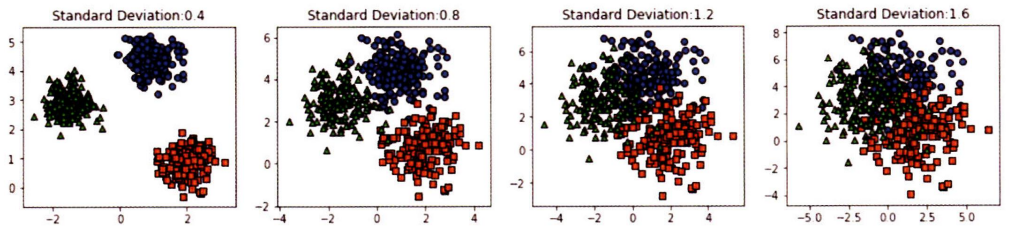

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 200개의 레코드와 2개의 피처가 3개의 군집화 기반 분포도를 가진 피처 데이터 세트 X와 동시에 3개의 군집화 값을 가진 target 데이터 세트 y가 반환
X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y,return_counts=True)
print(unique, counts) # 3개의 군집이 균일하게 구성되어 있음. 

(200, 2) (200,)
[0 1 2] [67 67 66]


In [7]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target']=y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


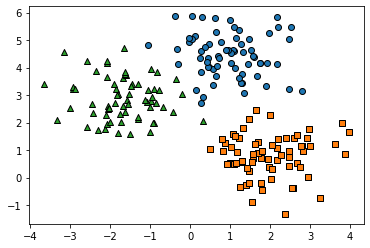

In [8]:
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값
markers = ['o','s','^','P','D','H','x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0,1,2]
# target=0, target=1, target=2로 scatter plot을 marker별로 생성
for target in target_list:
  target_cluster = clusterDF[clusterDF['target']==target]
  plt.scatter(x=target_cluster['ftr1'],y=target_cluster['ftr2'],edgecolor='k',marker=markers[target])
plt.show()

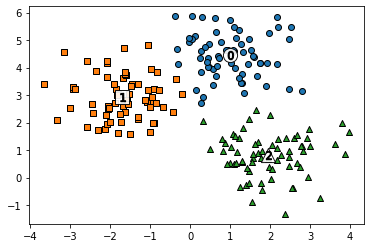

In [9]:
# KMeans 객체를 이용해 X데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o','s','^','P','D','H','x']

# 군집된 label 유형별로 iteration하면서 marker별로 scatter plot 수행
for label in unique_labels:
  label_cluster = clusterDF[clusterDF['kmeans_label']==label]
  center_x_y = centers[label]
  plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],edgecolor='k',marker=markers[label])
  # 군집 별 중심 위치 좌표 시각화
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=200,color='white',alpha=0.9,edgecolor='k', marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' %label)
plt.show()

In [10]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


## 02 군집 평가(Cluster Evaluation)

- 군집화는 데이터 내에 숨어 있는 별도의 그룹을 찾아서 의미를 부여하거나 동일한 분류 값에 속하더라도 그 안에서 세분화된 군집화를 추구하거나 서로 다른 분류 값의 데이터도 더 넓은 군집화 레벨화 등의 영역을 가짐. (target 레이블X)

- 군집화의 성능 평가 방법

### 실루엣 분석의 개요

- 실루엣 분석: 각 군집 간의 거리가 얼마나 효율적으로 분리되어 있는지를 나타냄. 효율적으로 잘 분리되었다는 것은 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 것을 의미함. 

- 실루엣 계수: 개별 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화되어 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리되어 있는지를 나타내는 지표

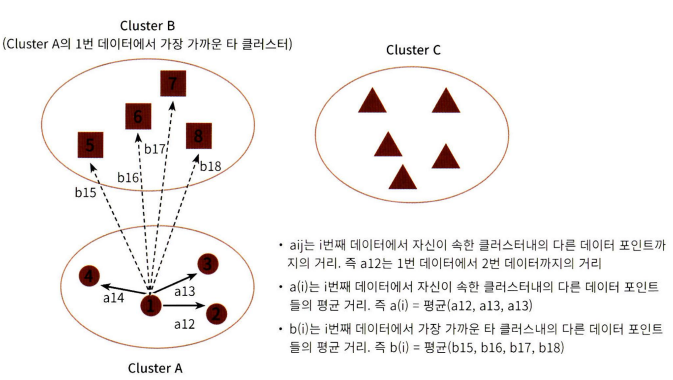

a(i): 특정 데이터 포인트의 실루에 계수 값은 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값

b(i): 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리

b(i)-a(i): 두 군집 간의 거리가 얼마나 떨어져 있는가의 값

실루엣 계수 s(i)
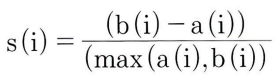

-1과 1 사이의 값을 가지며, 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것이고, 0에 가까워질수록 근처의 군집과 가까워진다는 것. -값은 아예 다른 군집에 데이터 포인트가 할당되었음을 의미함. 



- 실루엣 분석을 위한 메서드


각 데이터 포인트의 실루엣 계수 계산
```
sklearn.metrics.silhouette_samples(X,labels,metric = 'euclidean',**kwds) 
```

전체 데이터의 실루엣 계수 값을 평균해 반환
 
(=np.mean(sihouette_samples())

값이 높을수록 군집화가 어느 정도 잘 되었다고 판단
```
sklearn.metrics.silhouette_score(X,labels, metric = 'euclidean',sample_size = None, **kwds)
```

- 좋은 군집화가 되기 위한 조건

1. 전체 실루엣 계수의 평균값, 즉 사이킷런의 silhouette_score()값은 0~1 사이의 값을 가지며, 1에 가까울수록 좋음.

2. 하지만 전체 실루엣 계수의 평균값에 더불어 개별 군집의 평균값의 편차가 크지 않아야 함. 즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요함. 만약 전체 실루엣 계수의 평균값은 높지만, 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 군집들의 실루엣 계수 평균값은 낮으면 좋은 군집화 조건이 아님.

### 붓꽃 데이터 세트를 이용한 군집 평가

In [12]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster']=kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함.
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shaep', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score: {0:.3f}'.format(average_score))
irisDF.head(3)

# 평균 실루엣 계수 값은 약 0.553

silhouette_samples() return 값의 shaep (150,)
붓꽃 데이터 세트 Silhouette Analysis Score: 0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [15]:
# 군집 별 평균 실루엣 계수
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

### 군집 별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법







In [17]:
def visualize_silhouette(cluster_lists, X_features): 
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np
    import math
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    for ind, n_cluster in enumerate(cluster_lists):
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, 
                                   ith_cluster_sil_values, facecolor=color, 
                                   edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

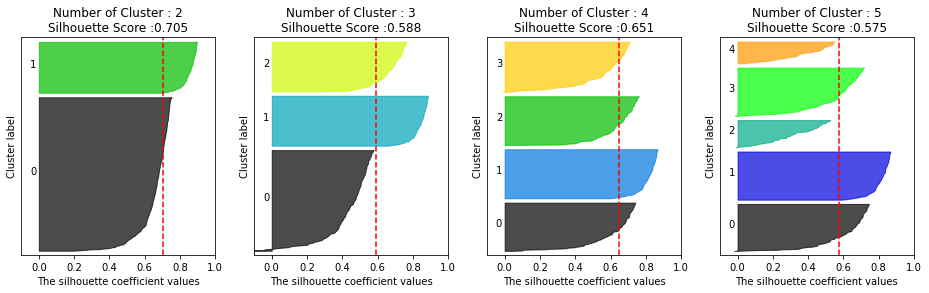

In [18]:
# make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, 
                 center_box=(-10,10), shuffle=True, random_state=1)
# 군집 개수가 2개, 3개, 4개, 5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5],X)

# 4개의 군집일 때 가장 최적이 됨.

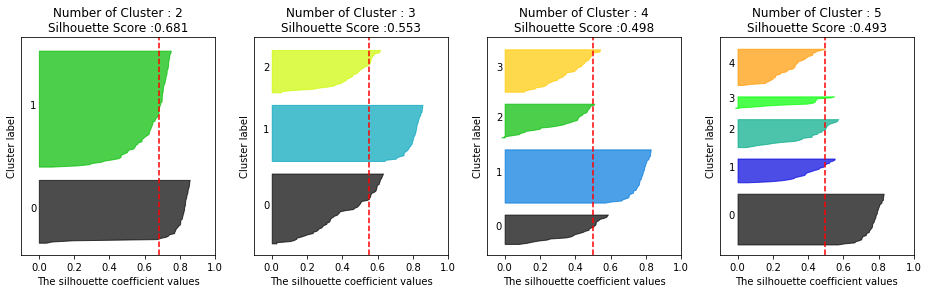

In [20]:
from sklearn.datasets import load_iris
iris=load_iris()
visualize_silhouette([2,3,4,5],iris.data)

# 2개의 군집일 때 가장 최적이 됨.

실루엣 계수를 통한 K-평균 군집 평가 방법은 각 데이터별로 다른 데이터와의 거리를 반복적으로 계산해야 하기 떄문에 데이터 양이 늘어나면 수행시간이 크게 늘어남. 이 경우 군집별로 임의의 데이터를 샘플링해 실루엣 계수를 평가하는 방안을 고민해야 함. 

## 3. 평균 이동

### 평균 이동(Mean Shift)의 개요

데이터가 모여 있는 밀도가 가장 높은 곳으로 군짐의 중심을 지속적으로 움직이면서 군집화를 수행함. 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정하며 군집 중심점을 찾음. 주어진 모델의 확률 밀도 함수를 찾기 위해서 KDE(Kernel Density Estimation)을 이용함.  

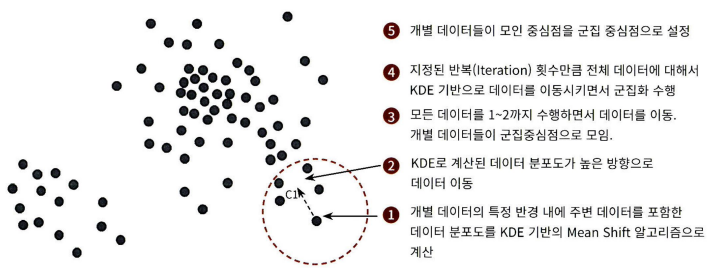

KDE(Kernel Density Estimation): 커널 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법. 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나누어 확률 밀도 함수를 추정함. 확률 밀도 함수를 알면 특정 변수가 어떤 값을 갖게 될지에 대한 확률을 알게 되므로 이를 통해 변수의 특성(평균, 분산), 확률 분포 등 변수의 많은 요소를 알 수 있음. 대표적인 커널 함수로 가우시안 분포 함수가 사용됨. 

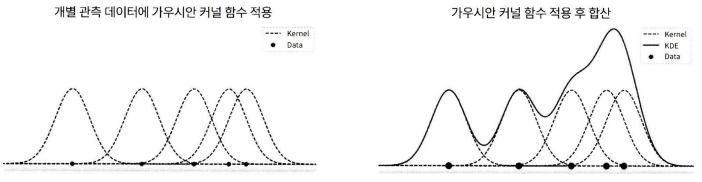

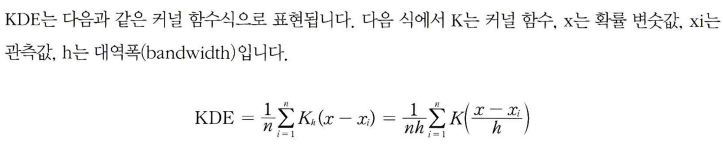

h(대역폭): KDE 형태를 부드러운(또는 뾰족한) 형태로 평활화(Smoothing)하는 데 적용되며, 확률 밀도 추정 성능을 크게 좌우할 수 있음. 

작은 h값은 좁고 뾰족한 KDE를 가지고, 변동성이 큰 방식으로 확률 밀도 함수를 추정하므로 과적합하기 쉬움.

매우 큰 h값은 과도하게 평활화된 KDE로 인해 지나치게 단순화된 방식으로 확률 밀도 함수를 추정하며 과소적합하기 쉬움. 

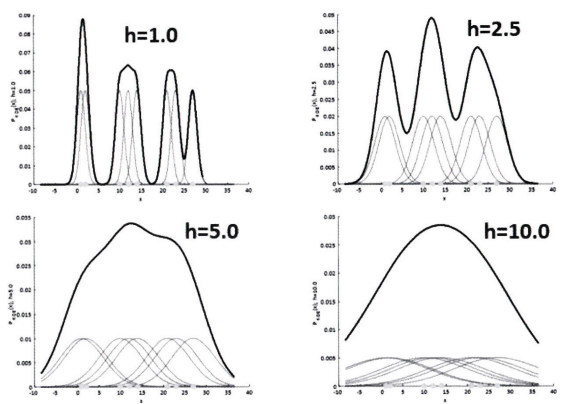

평균 이동 군집화는 군집의 개수를 지정하지 않고 대역폭의 크기에 따라 군집하를 수행함. 대역폭이 클수록 평활화된 KDE로 인해 적은 수의 군집 중심점을 가짐. 

In [21]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

# 군집이 6개로 분류됨. -> 지나치게 세분화됨.

cluster labels 유형: [0 1 2 3 4 5]


In [22]:
# bandwidth를 높이면 군집의 개수 감소
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


### 최적화된 bandwidth 찾기



```
from sklearn.cluster import estimate_bandwidth
estimate_bandwith(X)
```



In [23]:
from sklearn.cluster import estimate_bandwidth

bandwidth= estimate_bandwidth(X)
print('bandwidth 값:',round(bandwidth,3))

bandwidth 값: 1.816


In [24]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target']=y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth=estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


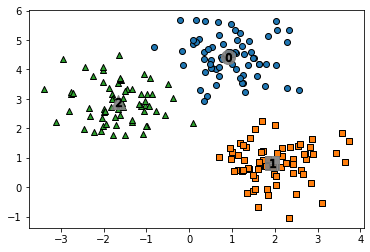

In [27]:
import matplotlib.pyplot as plt

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o','s','^','x','*']

for label in unique_labels:
  label_cluster = clusterDF[clusterDF['meanshift_label']==label]
  center_x_y=centers[label]

  # 군집별로 다른 마커로 산점도 적용
  plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],edgecolor='k',marker=markers[label])
  # 군집별 중심 표현
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' %label)
plt.show()

In [28]:
# targe값과 label값 비교
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


- 평균 이동의 장점: 

  데이터 세트의 형태를 특정 형태로 가정한다든가, 특정 분포도 기반의 모델로 가정하지 않기 때문에 좀 더 유연한 군집화가 가능함. 이상치의 영향력도 크지 않고, 미리 군집의 개수를 정할 필요가 없음.

- 평균 이동의 단점:

  알고리즘의 수행 시간이 오래 걸리고 bandwidth의 크기에 따른 군집화 영향도가 매우 큼. 
  
  -> 분석 업무 기반의 데이터 세트보다는 컴퓨터 비전 영역에서 더 많이 사용됨. 이미지나 영상 데이터에서 특정 객체를 구분하거나 움직임을 추적하는데 뛰어난 역할을 수행함.

## 4. GMM(Gaussian Mixture Model)

### GMM(Gaussian Mixture Model) 소개

- 적용하고자 하는 데이터가 여러 개의 가우시안 분포를 가진 데이터 집합들이 섞여서 생성될 것이라는 가정 하에 군집하를 수행하는 방식

- 정규 분포는 좌우 표준편차 1에 전체 데이터의 68.27%, 표준편차 2에 95.45%를 가지고 있음.

- GMM은 데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주함. 섞인 데이터 분포에서 개별 유형의 가우시안 분포를 추출함.

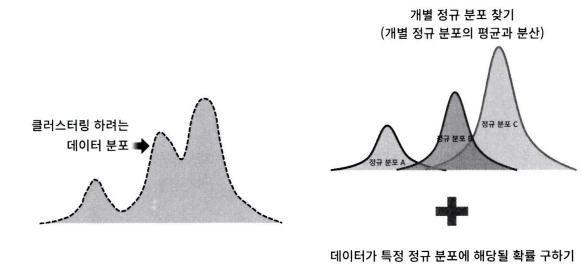

### 모수 추정 방식

- 개별 정규 분포의 평균과 분산
- 각 데이터가 어떤 정규 분포에 해당되는지의 확률 

모수 추정을 위해 GMM은 EM(Expectation and Maximization) 방법을 적용함.

# 중요한 초기화 파라미터

- n_components: gaussian mixture의 모델의 총 개수 

### GMM을 이용한 붓꽃 데이터 세트 군집화

In [30]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris=load_iris()
feature_names = ['sepal_length','speal_width','petal_length','petal_width']

irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target']=iris.target

# GaussianMixture (sklearn.mixture 패키지)로 군집화 수행 후 fit과 predict를 통해 군집을 결정
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 군집화 결과를 irisDF의 gmm_cluster 칼럼명으로 저장
irisDF['gmm_cluster']=gmm_cluster_labels

# target값에 따라 gmm_cluster 값이 어떻게 매핑되었는지 확인
iris_result = irisDF.groupby('target')['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


In [32]:
# K-평균 군지화 수행 결과
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby('target')['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


### GMM과 K-평균의 비교

- GMM은 확률 기반, K-평균은 거리 기반의 군집화 방식

- KMeans는 원형의 범위에서 군집화를 수행함. 데이터 세트가 **원형의 범위를 가질수록 KMeans의 군집화 효율은 더욱 높아짐**. 하지만, 데이터가 길쭉한 **타원형으로 늘어선 경우에는 군집화를 잘 수행하지 못함.**

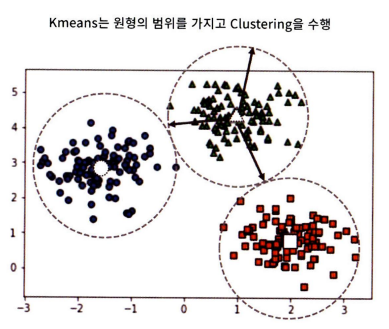

### visualize_cluster_plot() 함수 

- clusterobj: 사이킷런의 군집 수행 객체, KMeans나 GaussianMixture의 fit()와 predict()로 군집화를 완료한 객체. 만약 군집화의 결과 시각화가 아니고 make_blobs()로 생성한 데이터의 시각화일 경우 None 입력

- dataframe: 피처 데이터세트와 label값을 가진 DataFrame

- label_name: 군집화 결과 시각화일 경우 dataframe 내의 군집화 label 칼럼명, make_blobs() 결과 시각화일 경우 dataframe 내의 target 칼럼 명

- iscenter: 사이킷런 Cluster 객체가 군집 중심 좌표를 제공하면 True, 그렇지 않으면 False

In [34]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

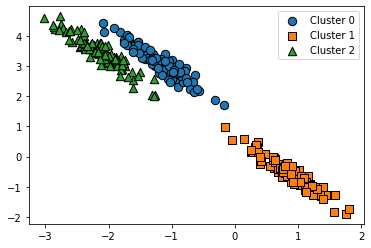

In [35]:
from sklearn.datasets import make_blobs

# make_blob()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦
X,y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환함. 
transformation = [[0.60834549, -0.63667341],[-0.40887718, 0.85253229]]
X_aniso = np.dot(X,transformation)

# feature 데이터 세트와 make_blob()의 y 결괏값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1','ftr2'])
clusterDF['target']=y

# 생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

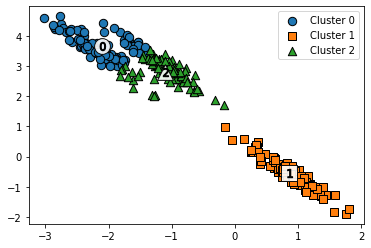

In [41]:
# 3개의 군집 기반 KMeans를 X_aniso 데이터 세트에 적용
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

# KMeans가 평균 거리 기반으로 군집화를 수행하므로 같은 거리상 원형으로 군집을 구성
# 길쭉한 방향으로 데이터가 밀접해 있을 경우 KMeans의 군집화 정확성이 떨어짐.

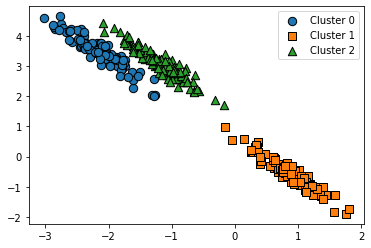

In [42]:
# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 지정
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

# GMM은 군집의 중심 좌표를 구할 수 없기 때문에 군집 중심 표현이 시각화되지는 않음.

In [43]:
# 군집 효율 차이 비교
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


## 5. DBSCAN

### DBSCAN의 개요

- 밀도 기반 군집화의 대표적인 알고리즘

- 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화 가능

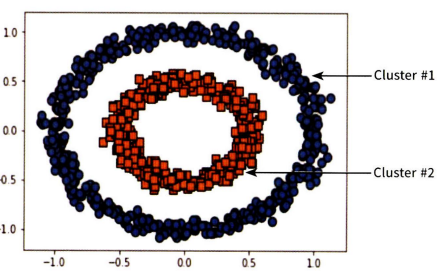

#### DBSCAN을 구성하는 가장 중요한 2가지 파라미터

- 입실론 주변 영역(epsilon): 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역

- 최소 데이터 개수(min points): 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수

#### 입실론 주변 영역 내에 포함되는 최소 데이터 개수를 충종시키는가 아닌가에 따라 데이터 포인트를 다음과 같이 정의함.

- 핵심 포인트(Core Point): 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우의 데이터

- 이웃 포인트(Neighbor Point): 주변 영역 내에 위치한 타 데이터

- 경계 포인트(Border Point): 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터 -> 군집의 외곽 형성

- 잡음 포인트(Noise Point): 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터

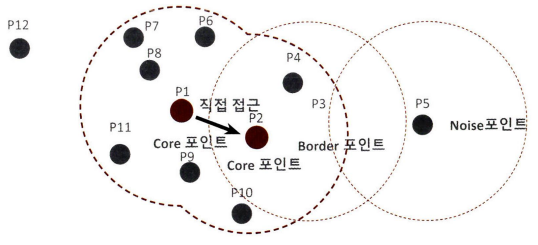

DBSCAN: 입실론 주변 영역의 최소 데이터 개수를 포함하는 밀도 기준을 충족시키는 데이터인 핵심 포인트를 연결하면서 군집화를 구성하는 방식

#### DBSCAN 클래스의 주요 초기화 파라미터

- eps: 입실론 주변 영역의 반경

- min_samples: 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함되어야 할 데이터의 최소 개수(자신의 데이터를 포함)

- eps을 크게 하면 반경이 커져 포함하는 데이터가 많아지므로 노이즈 데이터 개수가 작아짐.

- min_samples을 크게 하면 주어진 반경 내에서 더 많은 데이터를 포함시켜야 하므로 노이즈 데이터 개수가 커짐. 데이터 밀도가 더 커져야 하는데, 매우 촘촘한 데이터 분포가 아닌 경우 노이즈로 인식하기 때문

### DBSCAN 적용하기 - 붓꽃 데이터 세트

In [44]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target']=iris.target

iris_result = irisDF.groupby('target')['dbscan_cluster'].value_counts()
print(iris_result)

# 군집 레이블이 -1은 노이즈에 속하는 군집을 의미

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


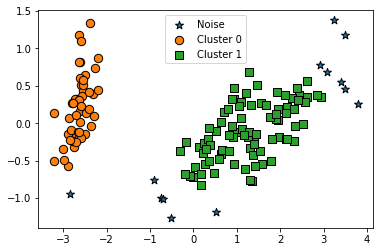

In [45]:
# DBSCAN으로 군집화 데이터 세트를 2차원 평면에 표현하기 위해 PCA를 이용해 2개의 피처로 압축 변환한 뒤 시각화하기

from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_components=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)

# visualize_cluster_2d() 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1']=pca_transformed[:,0]
irisDF['ftr2']=pca_transformed[:,1]

visualize_cluster_plot(dbscan,irisDF,'dbscan_cluster',iscenter=False)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


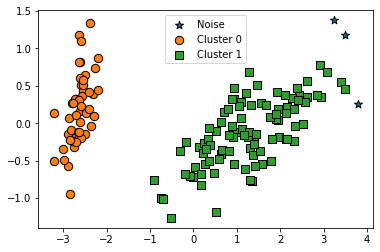

In [47]:
# eps를 0.8로 증가시키면 노이즈 데이터 감소
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster']=dbscan_labels
irisDF['target']=iris.target

iris_result = irisDF.groupby('target')['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


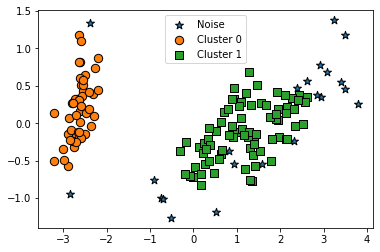

In [49]:
# min_samples를 16으로 증가시키면 노이즈 데이터 증가
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster']=dbscan_labels
irisDF['target']=iris.target

iris_result = irisDF.groupby('target')['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan,irisDF,'dbscan_cluster',iscenter=False)

### DBSCAN 적용하기 - make_circles() 데이터 세트


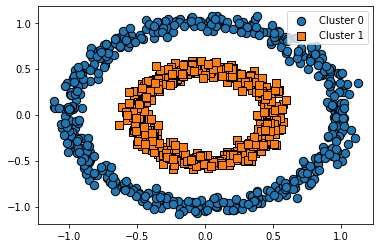

In [54]:
from sklearn.datasets import make_circles
# noise: 노이즈 데이터 세트 비율, factor: 외부 원과 내부 원의 scale비율
X,y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF=pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target']=y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

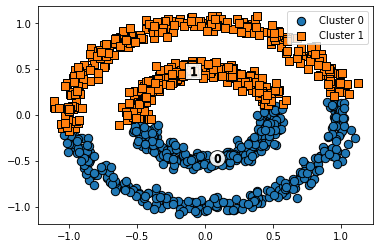

In [57]:
# KMeans로 make_circles() 데이터 세트를 군집화 수행
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster']=kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

# 거리 기반 군집화로는 위와 같이 데이터가 특정한 형태로 지속해서 이어지는 부분을 찾기 힘듬.

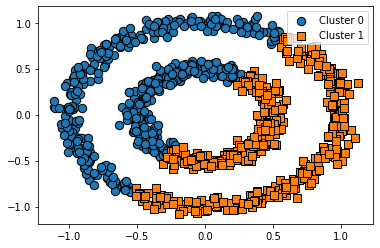

In [58]:
# GMM으로 make_circles() 데이터 세트를 군집화 수행
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster']=gmm_label

visualize_cluster_plot(gmm,clusterDF,'gmm_cluster',iscenter=False)

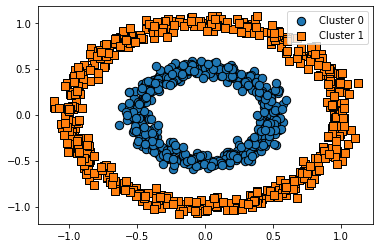

In [59]:
# DBSCAM으로 make_circles() 데이터 세트를 군집화 수행
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster']=dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)